In [26]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import glob

In [27]:
# Expect stable approximation

# Specify the directory to search
activation_list = ["linear", "hardtanh", "tanh"]
model_list = ["diagonalrnn", "rnn", "softplusrnn", "lru", "ssm", "softplusssm", "s4"]
rho_name_list = ["exp", "pol"]

index_0, index_1, index_2 = 2, 3, 1

activation = activation_list[index_0]
model = model_list[index_1]
rho_name = rho_name_list[index_2]


In [28]:
import glob
import os
from datetime import datetime

# Read all directories
directories = glob.glob(f"../logs/LF_{activation}_{model}_{rho_name}_PERTURB/runs/*")

# Define a function to parse the date label from a directory name
def parse_date_from_dir(dir_name):
    # Assume the date is at the end of the directory name in the format of YYYYMMDD
    date_str = os.path.basename(dir_name)
    
    # Modify the following line if your date format is different
    return datetime.strptime(date_str, '%Y%m%d')

# Sort the directories based on their date labels in descending order
directories.sort(key=parse_date_from_dir, reverse=True)

# The first directory is the latest one
latest_directory = directories[0]
print(f"Latest directory: {latest_directory}")

Latest directory: ../logs/LF_tanh_lru_pol_PERTURB/runs/20230718


In [29]:

# date = glob.glob(f"../logs/LF_{activation}_{model}_{rho_name}_PERTURB/runs/*")

# path = f"../logs/LF_{activation}_{model}_{rho_name}_PERTURB/runs/20230716"  # Very stable
path = latest_directory


['175658', '175840', '180044', '180251']


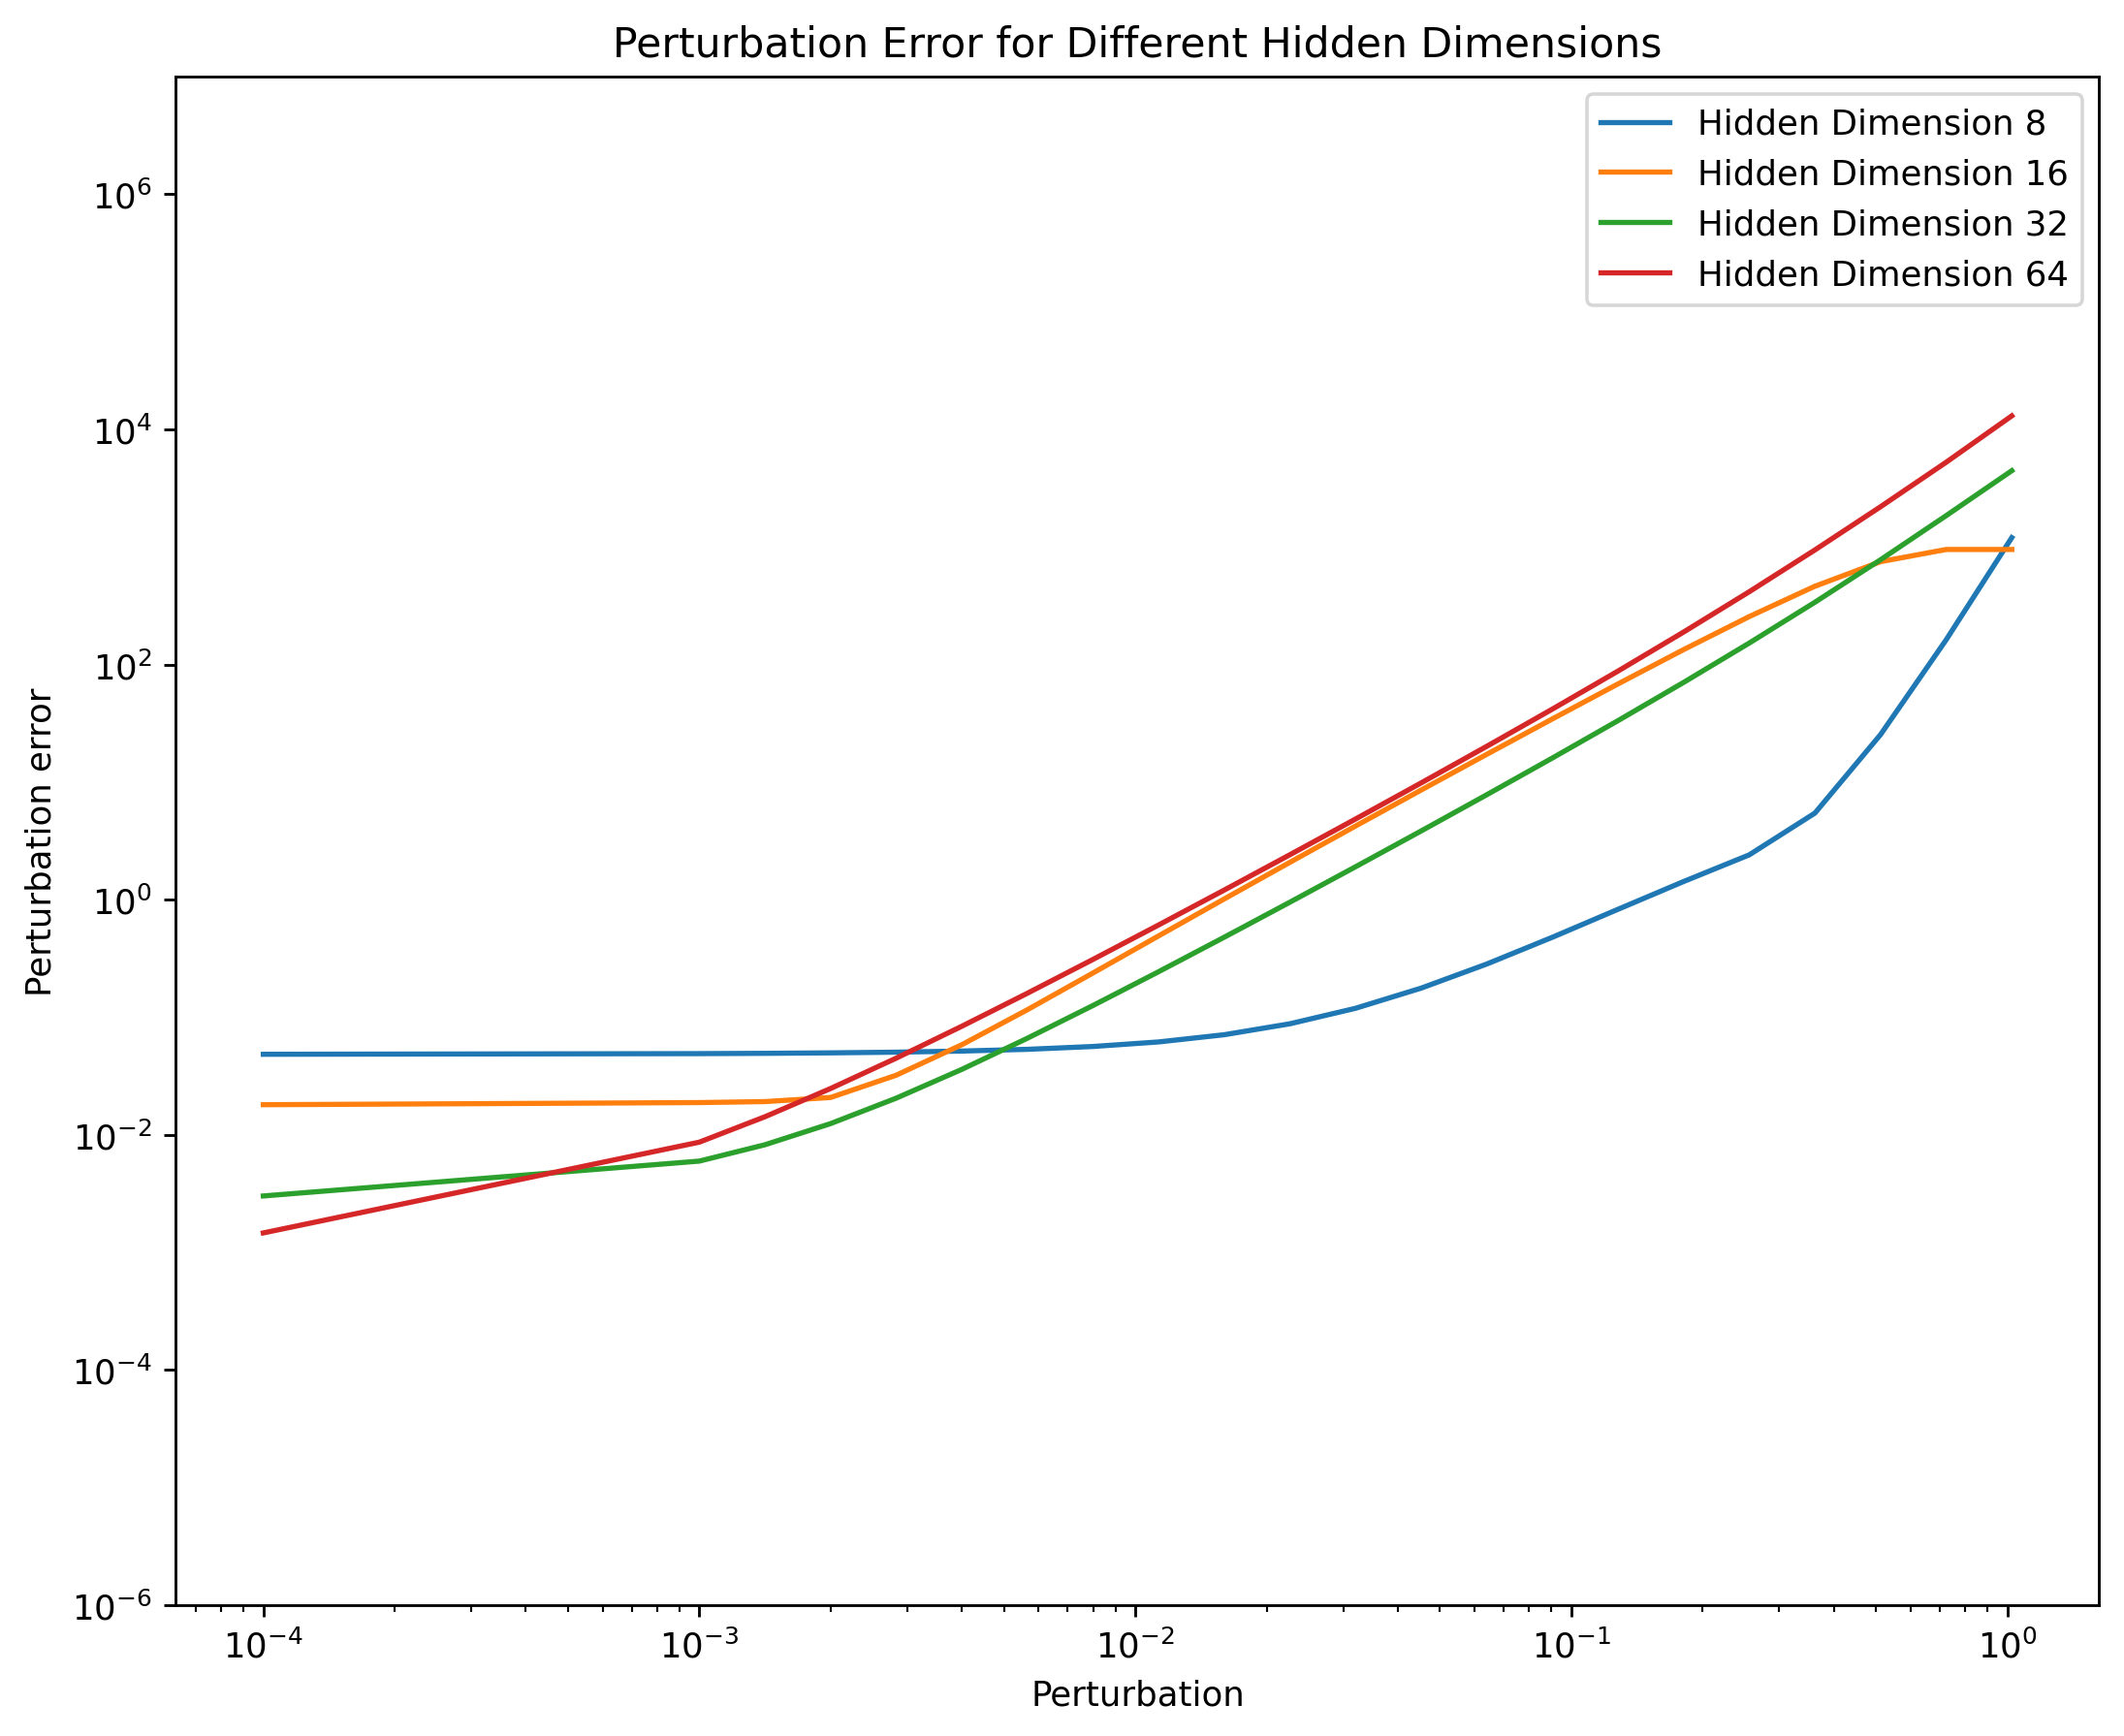

In [30]:
# Set the directory names, which in this case are also the hidden dimensions
hidden_dims = ["8", "16", "32", "64"]
# hidden_dims = ["8", "16", "32"]

# read the directory list in current directory
timestamps = [name for name in os.listdir(path) if os.path.isdir(os.path.join(path, name))]
# sort the timestamps
timestamps.sort()
print(timestamps)
# timestamps = timestamps[:4]
# timestamps = timestamps[4:8]
timestamps = timestamps[-4:]

plt.figure(figsize=(10, 8), dpi=256)

for index, (dim, timestamp) in enumerate(zip(hidden_dims, timestamps)):
    # Read the data from the CSV file
    data = pd.read_csv(os.path.join(path, timestamp, "perturbation_error.csv"))

    # Plot the data
    # print(data["perturbation_error"])
    data["perturbation"][0] = 1e-4
    plt.plot(data["perturbation"], data["perturbation_error"], label=f"Hidden Dimension {dim}")


# Add title and labels
plt.title("Perturbation Error for Different Hidden Dimensions")
plt.xlabel("Perturbation")
plt.ylabel("Perturbation error")

plt.xscale("log")
plt.yscale("log")
# plt.ylim([1e-4, 1e7])
plt.ylim([1e-6, 1e7])

# Add legend
plt.legend()

# Show the plot
plt.savefig(os.path.join(path, "perturbation_error.pdf"))
plt.savefig(os.path.join(path, "perturbation_error.png"))
plt.show()